# Machine Learning Model
**By: M. Alwi Sukra**

#### import useful libraries

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import tensorflow as tf
import time
from matplotlib import pyplot as plt

## ANN Model

#### get data

In [2]:
DATA_PATH = "dataset/ann-all"

In [3]:
X_train_ann = np.load(f"{DATA_PATH}-X_train.npy")
y_train_ann = np.load(f"{DATA_PATH}-y_train.npy")
X_test_ann = np.load(f"{DATA_PATH}-X_test.npy")
y_test_ann = np.load(f"{DATA_PATH}-y_test.npy")

In [4]:
X_train_ann[23]

array([0.70747894, 0.62666669, 0.08818361, 0.04614529, 0.        ,
       0.        ])

In [5]:
y_train_ann[23]

0

#### build ANN model

In [6]:
layers = [6,6,6]
short_desc = "ANN_all_feature"

In [7]:
# build model
ann_model = tf.keras.models.Sequential()
# add layers
for nodes in layers:
    ann_model.add(tf.keras.layers.Dense(nodes, activation=tf.nn.relu))
# output layer
ann_model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

In [8]:
# compile and train model
opt = tf.optimizers.Adam(lr=0.01)
acc = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
ann_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=[acc])

#### train model

In [9]:
epochs = 20

In [10]:
ann_model.fit(X_train_ann, y_train_ann, epochs=epochs, verbose=1)

Epoch 1/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.3608 - binary_accuracy: 0.8170
Epoch 2/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.3015 - binary_accuracy: 0.8456
Epoch 3/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.2867 - binary_accuracy: 0.8550A: 1s 
Epoch 4/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.2747 - binary_accuracy: 0.8617
Epoch 5/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.2673 - binary_accuracy: 0.8661
Epoch 6/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.2606 - binary_accuracy: 0.8699
Epoch 7/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.2577 - binary_accuracy: 0.8708
Epoch 8/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.2478 - binary_accuracy: 0.8812
Epoch 9/20
1414/1414 [==============================] - 4s 3ms/step - loss: 0.2387 - binary_accuracy: 0.8871
Epoch 10/20
1

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(ann_model)
tflite_model = converter.convert()
open("./tflite-model/ann_drowsy.tflite", "wb").write(tflite_model)

2404

#### evaluate model

In [20]:
start_time = time.time()
ann_model.evaluate(X_test_ann, y_test_ann, verbose=1)
time_taken = (time.time() - start_time)/len(y_test_ann) * 1000
print(f"time taken per input: {time_taken} ms")

354/354 [==============================] - 1s 3ms/step - loss: 0.2216 - binary_accuracy: 0.8575
time taken per input: 0.09950229762519208 ms


In [21]:
y_pred = ann_model.predict(X_test_ann)
y_pred_ann = []
for pred in y_pred:
    if(pred >= 0.5):
        y_pred_ann.append(1)
    else:
        y_pred_ann.append(0)
y_pred_ann = np.array(y_pred_ann)

In [22]:
ann_conf = tf.math.confusion_matrix(y_test_ann, y_pred_ann)

Text(0.5, 15.0, 'Predicted label')

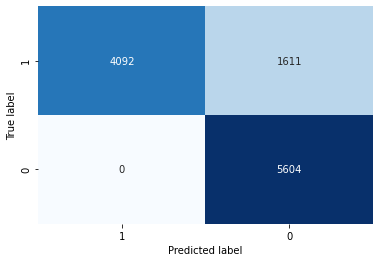

In [23]:
sns.heatmap(ann_conf.numpy(), annot=True, fmt='d', cmap='Blues', xticklabels=[1,0], yticklabels=[1,0], cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [15]:
TP = 4092
TN = 5604
FP = 0
FN = 1611

In [16]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
misclassification_rate = 1-accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
f1score = 2 * ((precision*recall)/(precision+recall))

In [17]:
ann_evaluation = ['ann', accuracy, misclassification_rate, precision, recall, specificity, f1score]

In [18]:
print(ann_evaluation)

['ann', 0.8575218890952507, 0.14247811090474927, 1.0, 0.7175170962651236, 1.0, 0.8355283307810107]


## LSTM Model

#### get data

In [2]:
DATA_PATH = "dataset/lstm-base"

In [3]:
X_train_lstm = np.load(f"{DATA_PATH}-X_train.npy")
y_train_lstm = np.load(f"{DATA_PATH}-y_train.npy")
X_test_lstm = np.load(f"{DATA_PATH}-X_test.npy")
y_test_lstm = np.load(f"{DATA_PATH}-y_test.npy")

In [4]:
X_train_lstm[76]

array([[0.46524946, 0.37665594, 0.06368982],
       [0.4748797 , 0.3735499 , 0.06272768],
       [0.47463787, 0.36929742, 0.06776297],
       ...,
       [0.51165533, 0.40475967, 0.06315798],
       [0.49011338, 0.38822615, 0.062077  ],
       [0.49501998, 0.40690942, 0.07981111]])

In [5]:
y_train_lstm[76]

0

In [6]:
(32,X_train_lstm.shape[1],X_train_lstm.shape[2])

(32, 480, 3)

#### build LSTM Model

In [7]:
# build model
lstm_model = tf.keras.models.Sequential()
# lstm
lstm_model.add(tf.keras.layers.LSTM(1, activation=tf.nn.tanh, batch_input_shape=(32,X_train_lstm.shape[1],X_train_lstm.shape[2])))
# output
lstm_model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

In [8]:
# compile and train model
opt = tf.optimizers.Adam(lr=0.001)
acc = tf.keras.metrics.BinaryAccuracy(threshold=0.5)
lstm_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=[acc])

#### train model

In [9]:
epochs = 20

In [10]:
lstm_model.fit(X_train_lstm, y_train_lstm, epochs=epochs, verbose=1)

Epoch 1/20
241/241 [==============================] - 5s 21ms/step - loss: 0.6931 - binary_accuracy: 0.5017
Epoch 2/20
241/241 [==============================] - 4s 17ms/step - loss: 0.6895 - binary_accuracy: 0.5266
Epoch 3/20
241/241 [==============================] - 4s 18ms/step - loss: 0.6879 - binary_accuracy: 0.6033
Epoch 4/20
241/241 [==============================] - 4s 18ms/step - loss: 0.6842 - binary_accuracy: 0.6102
Epoch 5/20
241/241 [==============================] - 4s 18ms/step - loss: 0.6585 - binary_accuracy: 0.6350
Epoch 6/20
241/241 [==============================] - 4s 18ms/step - loss: 0.5813 - binary_accuracy: 0.7426
Epoch 7/20
241/241 [==============================] - 4s 18ms/step - loss: 0.5244 - binary_accuracy: 0.7864
Epoch 8/20
241/241 [==============================] - 4s 18ms/step - loss: 0.5158 - binary_accuracy: 0.7819
Epoch 9/20
241/241 [==============================] - 5s 20ms/step - loss: 0.5123 - binary_accuracy: 0.7819
Epoch 10/20
241/241 [=======

#### evaluate model

In [29]:
start_time = time.time()
lstm_model.evaluate(X_test_lstm, y_test_lstm, verbose=1)
time_taken = (time.time() - start_time)/len(y_test_ann) * 1000
print(f"time taken per input: {time_taken} ms")

61/61 [==============================] - 1s 11ms/step - loss: 0.1182 - binary_accuracy: 0.9549
time taken per input: 0.08698870651367921 ms


In [30]:
y_pred = lstm_model.predict(X_test_lstm)
y_pred_lstm = []
for pred in y_pred:
    if(pred >= 0.5):
        y_pred_lstm.append(1)
    else:
        y_pred_lstm.append(0)
y_pred_lstm = np.array(y_pred_lstm)

In [31]:
lstm_conf = tf.math.confusion_matrix(y_test_lstm, y_pred_lstm)

Text(0.5, 15.0, 'Predicted label')

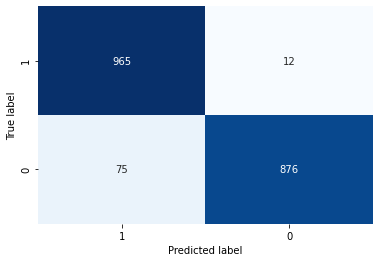

In [32]:
sns.heatmap(lstm_conf.numpy(), annot=True, fmt='d', cmap='Blues', xticklabels=[1,0], yticklabels=[1,0], cbar=False)
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [42]:
TP = 965
TN = 576
FP = 75
FN = 12

In [43]:
accuracy = (TP+TN)/(TP+TN+FP+FN)
misclassification_rate = 1-accuracy
precision = TP/(TP+FP)
recall = TP/(TP+FN)
specificity = TN/(TN+FP)
f1score = 2 * ((precision*recall)/(precision+recall))

In [44]:
lstm_evaluation = ['lstm', accuracy, misclassification_rate, precision, recall, specificity, f1score]

#### Model Comparison

In [45]:
evaluations = [ann_evaluation, lstm_evaluation]

In [47]:
df_eval = pd.DataFrame(evaluations, columns=['model', 'accuracy', 'misclassification_rate', 'precision', 'recall', 'specificity', 'f1score'])

In [48]:
df_eval.head()

,model,accuracy,misclassification_rate,precision,recall,specificity,f1score
0,ann,0.998497,0.001503,0.999648,0.997362,0.999644,0.998504
1,lstm,0.946560,0.053440,0.927885,0.987718,0.884793,0.956867


Text(0.5, 1.0, 'accuracy')

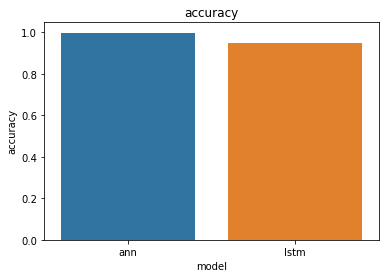

In [50]:
sns.barplot(x='model', y='accuracy', data=df_eval)
plt.title('accuracy')

Text(0.5, 1.0, 'misclassification_rate')

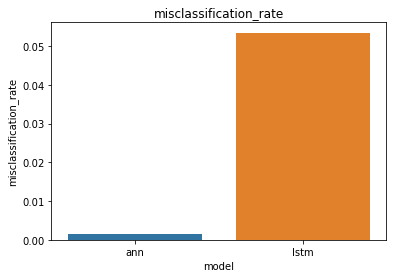

In [51]:
sns.barplot(x='model', y='misclassification_rate', data=df_eval)
plt.title('misclassification_rate')

Text(0.5, 1.0, 'precision')

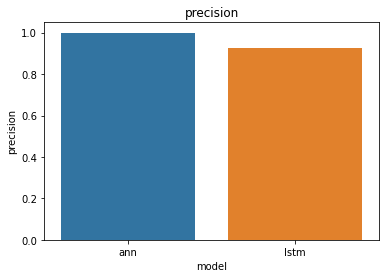

In [52]:
sns.barplot(x='model', y='precision', data=df_eval)
plt.title('precision')

Text(0.5, 1.0, 'recall')

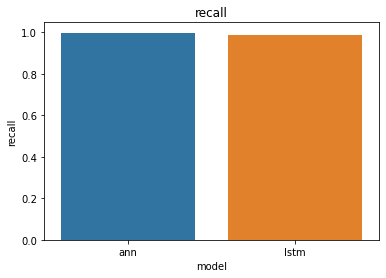

In [53]:
sns.barplot(x='model', y='recall', data=df_eval)
plt.title('recall')

Text(0.5, 1.0, 'specificity')

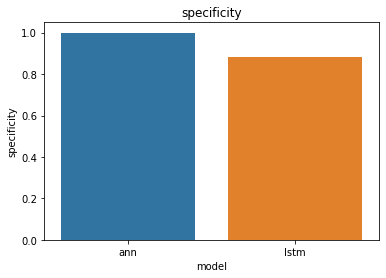

In [54]:
sns.barplot(x='model', y='specificity', data=df_eval)
plt.title('specificity')

Text(0.5, 1.0, 'f1score')

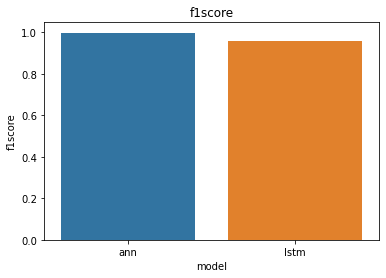

In [55]:
sns.barplot(x='model', y='f1score', data=df_eval)
plt.title('f1score')

In [56]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  60        
_________________________________________________________________
dense_1 (Dense)              multiple                  20        
_________________________________________________________________
dense_2 (Dense)              multiple                  20        
_________________________________________________________________
dense_3 (Dense)              multiple                  5         
Total params: 105
Trainable params: 105
Non-trainable params: 0
_________________________________________________________________


In [57]:
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1)                 64        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 2         
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


## Save Model 

In [59]:
ann_model.save(f"model/{time.time()}-ANN_model")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/1592289178.4695408-ANN_model\assets


In [60]:
lstm_model.save(f"model/{time.time()}-LSTM_model")

INFO:tensorflow:Assets written to: model/1592289238.7821648-LSTM_model\assets
